In [66]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 466s 3us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [51]:
def plot_image(x,y,index):
    classes=['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    plt.figure(figsize=(1,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index][0]])

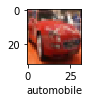

In [37]:
plot_image(x_train,y_train,5)

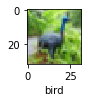

In [38]:
plot_image(x_train,y_train,6)

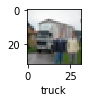

In [56]:
plot_image(x_train,y_train,16)

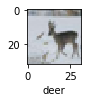

In [58]:
plot_image(x_train,y_train,20)

In [59]:
x_train=x_train/255
x_test=x_test/255

In [63]:
x_train.shape

(50000, 32, 32, 3)

# Classification with Artificial Nural Network

In [72]:
ANN = keras.Sequential ([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3072,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])
ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.9378 - accuracy: 0.3011
Epoch 2/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6620 - accuracy: 0.40740s - loss: 1.6621 - 
Epoch 3/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5761 - accuracy: 0.4428
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5110 - accuracy: 0.46450s - loss: 1
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4674 - accuracy: 0.4794


In [73]:
ANN.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.5150 - accuracy: 0.4575


[1.5150420665740967, 0.45750001072883606]

In [77]:
yp=ANN.predict(x_test)

In [80]:
y_test_predict=[np.argmax(x) for x in yp]    
y_test_predict[:5]

[3, 8, 8, 8, 4]

In [76]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.39      0.66      0.49      1000
           1       0.46      0.72      0.56      1000
           2       0.39      0.28      0.33      1000
           3       0.36      0.26      0.30      1000
           4       0.44      0.38      0.41      1000
           5       0.39      0.39      0.39      1000
           6       0.57      0.43      0.49      1000
           7       0.67      0.41      0.50      1000
           8       0.47      0.69      0.56      1000
           9       0.56      0.36      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



# Classification with Convolution Nural Network

In [85]:
CNN = keras.Sequential ([
    keras.layers.Conv2D(filters=32, activation='relu',kernel_size=(3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, activation='relu',kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),
    

    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3072,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    ])
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )
CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 218s 138ms/step - loss: 1.5919 - accuracy: 0.4116
Epoch 2/5
1563/1563 [==============================] - 205s 131ms/step - loss: 0.9635 - accuracy: 0.6636
Epoch 3/5
1563/1563 [==============================] - 207s 132ms/step - loss: 0.7221 - accuracy: 0.7457
Epoch 4/5
1563/1563 [==============================] - 213s 136ms/step - loss: 0.4958 - accuracy: 0.8272
Epoch 5/5
1563/1563 [==============================] - 211s 135ms/step - loss: 0.3031 - accuracy: 0.8984


In [86]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.0060 - accuracy: 0.7147


[1.0059876441955566, 0.7146999835968018]

In [87]:
yp=CNN.predict(x_test)

In [88]:
yp[:5]

array([[7.7046041e-04, 3.4133458e-04, 1.4187873e-03, 8.6595756e-01,
        1.2728387e-03, 1.2001855e-01, 5.2032719e-04, 1.9077399e-04,
        9.3858922e-03, 1.2356238e-04],
       [1.6153971e-02, 5.0180491e-02, 4.1723756e-06, 2.8966613e-05,
        1.8991326e-06, 1.9395061e-06, 1.5702017e-06, 5.3741059e-07,
        9.3176204e-01, 1.8643878e-03],
       [9.9778362e-03, 3.9425097e-02, 1.1747943e-04, 1.3756131e-04,
        4.6863887e-04, 9.5107944e-06, 1.7601927e-06, 1.5171530e-05,
        9.4011253e-01, 9.7344341e-03],
       [9.9879885e-01, 1.8507486e-05, 9.5854775e-05, 7.1681080e-07,
        5.5293704e-06, 1.0711075e-07, 1.3319372e-07, 2.5081004e-06,
        1.0124398e-03, 6.5523251e-05],
       [5.4670102e-07, 6.1603168e-07, 8.5125063e-03, 4.7751699e-02,
        9.1209322e-01, 7.6719117e-04, 3.0870652e-02, 8.3358060e-07,
        2.6584196e-06, 6.0760257e-08]], dtype=float32)

In [89]:
y_test_predict=[np.argmax(x) for x in yp]

In [91]:
y_test_predict[:10]

[3, 8, 8, 0, 4, 6, 5, 2, 3, 1]

In [95]:
y_test[:10].reshape(-1,)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

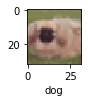

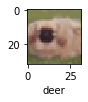

In [180]:
classes=['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
xx=31
plt.figure(figsize=(1,1))
plt.imshow(x_test[xx])
plt.xlabel(classes[y_test[xx][0]])
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(x_test[xx])
plt.xlabel(classes[y_test_predict[xx]])
plt.show()

In [181]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1000
           1       0.82      0.84      0.83      1000
           2       0.64      0.61      0.63      1000
           3       0.57      0.50      0.53      1000
           4       0.64      0.71      0.67      1000
           5       0.58      0.69      0.63      1000
           6       0.90      0.69      0.78      1000
           7       0.85      0.68      0.75      1000
           8       0.79      0.82      0.81      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

